# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import wget,os
import scipy.sparse

### 1-3. 한글 글꼴 설정(Windows)

In [3]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

In [4]:
# !sudo apt-get install -y fonts-nanum

### 1-4. 자바 경로 설정(Windows)

In [5]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [6]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [7]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

### 1-4. 구글드라이브 연결(Colab)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [10]:
x_train = scipy.sparse.load_npz('/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/train_dataset2.npz')
x_test = scipy.sparse.load_npz('/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/test_dataset2.npz')
y_train = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/y_train2.csv', index_col=0)
y_test = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/y_test2.csv', index_col=0)

In [11]:
y_test

,label
0,0
1,0
2,3
3,3
4,0
...,...
1107,1
1108,2
1109,1
1110,0


## 3. Machine Learning(N-grams)
* N-gram으로 전처리한 데이터를 이용하여 3개 이상의 Machine Learning 모델 학습 및 성능 분석
> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

In [12]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

### 3-1. Model 1

In [13]:
model_rf = RandomForestClassifier()

model_rf.fit(x_train.toarray(), y_train)

<ipython-input-13-cc1c8cdf5606>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train.toarray(), y_train)


RandomForestClassifier()

In [14]:
y_pred_rf = model_rf.predict(x_test.toarray())

In [15]:
y_pred_rf.shape, y_test.shape

((1112,), (1112, 1))

In [16]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[481  12  12   3   1]
 [109  86   8   5   0]
 [110   3  88   3   0]
 [ 42   6   2 105   1]
 [  2   1   0   0  32]]
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       509
           1       0.80      0.41      0.54       208
           2       0.80      0.43      0.56       204
           3       0.91      0.67      0.77       156
           4       0.94      0.91      0.93        35

    accuracy                           0.71      1112
   macro avg       0.82      0.68      0.71      1112
weighted avg       0.75      0.71      0.69      1112



### 3-2. Model 2

In [17]:
model_svm = SVC()
model_svm.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [18]:
y_pred_svm = model_svm.predict(x_test)

In [19]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[490   5  12   2   0]
 [110  86   9   3   0]
 [ 80   2 122   0   0]
 [ 38   5   4 109   0]
 [  9   3   0   2  21]]
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       509
           1       0.85      0.41      0.56       208
           2       0.83      0.60      0.70       204
           3       0.94      0.70      0.80       156
           4       1.00      0.60      0.75        35

    accuracy                           0.74      1112
   macro avg       0.86      0.65      0.72      1112
weighted avg       0.78      0.74      0.73      1112



### 3-3. Model 3

In [20]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 18.0 MB/s eta 0:00:00


In [21]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [22]:
x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(x_train, y_train, 
                                                          train_size=0.8,
                                                          random_state=42)

train_dataset = Pool(x_train_2.toarray(), y_train_2)

In [ ]:
# model_cb = CatBoostClassifier()

# model_cb.fit(x_train, y_train)

Learning rate set to 0.083068
0:	learn: 1.5509595	total: 196ms	remaining: 3m 15s
1:	learn: 1.4925817	total: 320ms	remaining: 2m 39s
2:	learn: 1.4512270	total: 430ms	remaining: 2m 23s
3:	learn: 1.4189463	total: 539ms	remaining: 2m 14s
4:	learn: 1.3930197	total: 650ms	remaining: 2m 9s
5:	learn: 1.3691744	total: 762ms	remaining: 2m 6s
6:	learn: 1.3478544	total: 878ms	remaining: 2m 4s
7:	learn: 1.3210307	total: 995ms	remaining: 2m 3s
8:	learn: 1.3049758	total: 1.11s	remaining: 2m 2s
9:	learn: 1.2860091	total: 1.22s	remaining: 2m 1s
10:	learn: 1.2669495	total: 1.34s	remaining: 2m
11:	learn: 1.2529297	total: 1.45s	remaining: 1m 59s
12:	learn: 1.2409593	total: 1.57s	remaining: 1m 59s
13:	learn: 1.2285982	total: 1.68s	remaining: 1m 58s
14:	learn: 1.2178972	total: 1.8s	remaining: 1m 57s
15:	learn: 1.2062084	total: 1.91s	remaining: 1m 57s
16:	learn: 1.1916095	total: 2.03s	remaining: 1m 57s
17:	learn: 1.1823169	total: 2.14s	remaining: 1m 56s
18:	learn: 1.1709021	total: 2.25s	remaining: 1m 56s
19:

In [ ]:
# y_pred_cb = model_cb.predict(x_test)

In [ ]:
# print(confusion_matrix(y_test, y_pred_cb))
# print(classification_report(y_test, y_pred_cb))

[[435  19  29   2   0]
 [ 99 120   7   4   0]
 [ 77   9 110   6   0]
 [ 46  12   8 100   0]
 [  3   0   0   0  26]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       485
           1       0.75      0.52      0.62       230
           2       0.71      0.54      0.62       202
           3       0.89      0.60      0.72       166
           4       1.00      0.90      0.95        29

    accuracy                           0.71      1112
   macro avg       0.80      0.69      0.73      1112
weighted avg       0.73      0.71      0.70      1112



### 3-4. Hyperparameter Tuning(Optional) 
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

In [23]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import scikitplot as skplt

In [ ]:
param_cb = {'depth'       : [4, 6],
            'l2_leaf_reg' : [2, 10, 20, 30],
            'logging_level':['Silent'],
            'leaf_estimation_iterations': [10]
            }

model_cb_grid = GridSearchCV(estimator=model_cb, param_grid = param_cb,
                            cv = 2, n_jobs=-1, verbose=3)

In [ ]:
model_cb_grid.fit(x_train.toarray(), y_train, verbose=3)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f324f0e6ca0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6], 'l2_leaf_reg': [2, 10, 20, 30],
                         'leaf_estimation_iterations': [10],
                         'logging_level': ['Silent']},
             verbose=3)

In [ ]:
best_param = model_cb_grid.best_params_
best_param

{'depth': 6,
 'l2_leaf_reg': 2,
 'leaf_estimation_iterations': 10,
 'logging_level': 'Silent'}

In [25]:
model_cb_best = CatBoostClassifier(iterations=1000,
                                    depth=6,
                                    l2_leaf_reg=2,
                                    leaf_estimation_iterations=10,
                                    use_best_model=True,
                                    logging_level='Silent')

In [ ]:
model_cb_best = CatBoostClassifier(iterations=1000,
                                   depth=best_param['depth'],
                                   l2_leaf_reg=best_param['l2_leaf_reg'],
                                   leaf_estimation_iterations=10,
                                   use_best_model=True,
                                   logging_level='Silent')

NameError: ignored

In [26]:
model_cb_best.fit(train_dataset, eval_set=(x_val_2.toarray(), y_val_2))

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

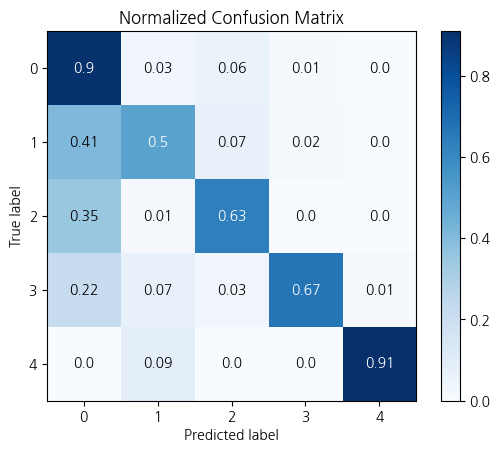

In [27]:
y_pred_cb = model_cb_best.predict(x_test.toarray())
skplt.metrics.plot_confusion_matrix(y_test, y_pred_cb, normalize=True)

In [28]:
print(confusion_matrix(y_test, y_pred_cb))
print(classification_report(y_test, y_pred_cb))

[[460  13  31   4   1]
 [ 85 104  15   4   0]
 [ 72   3 128   1   0]
 [ 34  11   5 105   1]
 [  0   3   0   0  32]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       509
           1       0.78      0.50      0.61       208
           2       0.72      0.63      0.67       204
           3       0.92      0.67      0.78       156
           4       0.94      0.91      0.93        35

    accuracy                           0.75      1112
   macro avg       0.81      0.72      0.76      1112
weighted avg       0.76      0.75      0.74      1112



In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.classification import *
exp_class101 = setup(data=x_train, target=y_train, , session_id=123)

ValueError: ignored

## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

### 4-1. DNN

### 4-2. 1-D CNN

### 4-3. LSTM

## 5. Using pre-trained model(Optional)
* 한국어 pre-trained model로 fine tuning 및 성능 분석
> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)
> * [HuggingFace-Korean](https://huggingface.co/models?language=korean)